# Install PySpark and related dependencies

In [ ]:
!pip install pyspark==2.4.5
!pip install handyspark 
!pip install -U -q PyDrive
!pip install elephas
!apt install openjdk-8-jdk-headless -qq

     |████████████████████████████████| 217.8MB 43kB/s 
     |████████████████████████████████| 204kB 49.7MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=1c54a58579f986520d93b8b218100b78212a5a1b341666bbf4c181472310068d
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 33 not upgraded.
Need to get 35.8 MB of archives.
After this 

# Import useful Python packages

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd
import librosa
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import os
import glob
import csv

In [ ]:
# Import Java path--> Set path to JAVA_HOME
JAVA_HOME = "/usr/lib/jvm/java-8-openjdk-amd64"
import os
import math 
from handyspark import *
os.environ["JAVA_HOME"] = JAVA_HOME
# Spark Session, Pipeline, Functions, and Metrics
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, StandardScaler, VectorAssembler
#from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, StandardScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import rand
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
# Keras / Deep Learning
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers, regularizers
from keras.optimizers import Adam
# Elephas for Deep Learning on Spark
from elephas.ml_model import ElephasEstimator
# Google drive
from google.colab import drive
# ML libraries
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
# CSV and pandas libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from handyspark import *
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import rand
from pyspark.mllib.evaluation import MulticlassMetrics
# Keras / Deep Learning
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers, regularizers
from keras.optimizers import Adam
# Elephas for Deep Learning on Spark
from elephas.ml_model import ElephasEstimator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


WARNING


# *Create Spark context*

In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050").set('spark.executor.memory', '4G').set('spark.driver.memory', '45G').set('spark.driver.maxResultSize', '10G')

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()
sql_context = SQLContext(sc)
print(sc)
print(sc._conf.getAll())

<SparkContext master=local[*] appName=pyspark-shell>
[('spark.driver.memory', '45G'), ('spark.driver.port', '44511'), ('spark.app.id', 'local-1594021646389'), ('spark.executor.id', 'driver'), ('spark.driver.maxResultSize', '10G'), ('spark.app.name', 'pyspark-shell'), ('spark.ui.port', '4050'), ('spark.rdd.compress', 'True'), ('spark.serializer.objectStreamReset', '100'), ('spark.driver.host', 'a20cb7362095'), ('spark.master', 'local[*]'), ('spark.submit.deployMode', 'client'), ('spark.executor.memory', '4G'), ('spark.ui.showConsoleProgress', 'true')]


# Define Google Drive Path

In [ ]:
# Google Drive Prepration
GDRIVE_DIR = "/content/gdrive" # Your own mount point on Google Drive
GDRIVE_HOME_DIR = GDRIVE_DIR + "/My Drive" # Your own home directory
GDRIVE_DATA_DIR = GDRIVE_HOME_DIR + "/1911242_1916304/Sample_Data" # Your own data directory

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount(GDRIVE_DIR, force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Extracting CQT feature from a sample audio

(84, 87)


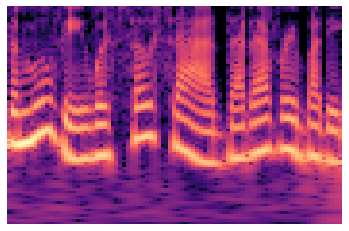

In [ ]:
y, sr = librosa.load('/content/gdrive/My Drive/1911242_1916304/Sample_Data/file2.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav')
C = np.abs(librosa.cqt(y, sr=sr))

plt.figure()
ax = plt.axes()
ax.set_axis_off()
librosa.display.specshow(librosa.amplitude_to_db( C, ref=np.max))

print(C.shape)

# Extract CQT Features From Dataset(Only Run it when you want to make your CSV dataset)

In [ ]:

path = "/content/gdrive/My Drive/1911242_1916304/RawAudioDataset/train/real/"
files = os.listdir(path)
i=0
for filename in glob.glob(os.path.join(path, '*.wav')):
    print(filename)
    y, sr = librosa.load(filename)
    C = np.abs(librosa.cqt(y, sr=sr))                             
    CC=C.reshape(-1,1).T
    df = pd.DataFrame(CC)
    df.to_csv('/content/gdrive/My Drive/1911242_1916304/RawAudioDataset/train/TrainSet.csv', mode='a', header=False)
    print(i)
    i=i+1
print(C.shape)


# **Data sampling(Only run the following step, incase you need Sampling from data)** 

# 1. Sampling on Trainset

Here we perfom sampling on train data. Firstly, we divide the population into subgroups based on labels (Real and Fake). And then we select the samples from these subgroups. This method is called **stratified** sampling. Then we perform **systematic** sampling. In this type of sampling, the first individual is selected and others are selected using a fixed **'sampling interval'**. In this example the sampling interval equals to 8.

In [ ]:

with open('/content/gdrive/My Drive/1911242_1916304/Dataset/CQTraw.csv', 'r') as file:
    reader = csv.reader(file, delimiter = ',')
    i=0
    for i, row in enumerate(reader):
        if i%8==0:
            #print(row)
            import csv
            with open('/content/gdrive/My Drive/1911242_1916304/Dataset/CQTsampling8.csv', 'a', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(row)


"\nwith open('/content/gdrive/My Drive/1911242_1916304/Dataset/CQTraw.csv', 'r') as file:\n    reader = csv.reader(file, delimiter = ',')\n    i=0\n    for i, row in enumerate(reader):\n        if i%8==0:\n            #print(row)\n            import csv\n            with open('/content/gdrive/My Drive/1911242_1916304/Dataset/CQTsampling8.csv', 'a', newline='') as file:\n                writer = csv.writer(file)\n                writer.writerow(row)\n"

# **Data Preprocessing** 

# 1. Shuffle data on Trainset (Do not run this part everytime)

Here we Shuffle the train data 



In [ ]:

df = pd.read_csv('/content/gdrive/My Drive/1911242_1916304/Dataset/CQTraw.csv') # avoid header=None. 
shuffled_df = df.sample(frac=1)
shuffled_df.to_csv('/content/gdrive/My Drive/1911242_1916304/Dataset/CQTshuffle.csv', index=False)


# 2. Shuffle data on Testset (Do not run this part everytime)

Here we Shuffle the test data


In [ ]:

dftest = pd.read_csv('/content/gdrive/My Drive/1911242_1916304/Dataset/CQTtest.csv') # avoid header=None. 
shuffled_dftest = dftest.sample(frac=1)
shuffled_dftest.to_csv('/content/gdrive/My Drive/1911242_1916304/Dataset/CQTtestshuffle.csv', index=False)


# **Data Summary on Train Set**




# Load train data to spark dataframe

In [ ]:
df_train = sql_context.read.csv('/content/gdrive/My Drive/1911242_1916304/Dataset/CQTshuffle.csv',
                    header=True,
                    inferSchema=True)

# Data set preprocessing


Check for any missing values

In [ ]:

for c in df_train.columns:
  print("N. of missing values of column `{:s}` = {:d}".format(c, df_train.where(col(c).isNull()).count()))


# Statistical summary of train data

Check the shape of the train loaded dataset, i.e., number of rows and columns





In [ ]:
print("The shape of the train dataset is {:d} rows by {:d} columns".format(df_train.count(), len(df_train.columns)))

The shape of the train dataset is 13956 rows by 7309 columns


Statistical summary of data

In [ ]:
df_train.describe('label').show()

+-------+------------------+
|summary|             label|
+-------+------------------+
|  count|             13956|
|   mean|               0.5|
| stddev|0.5000179144049789|
|    min|                 0|
|    max|                 1|
+-------+------------------+



Count data with pos and neg labels

In [ ]:
df_train.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1| 6978|
|    0| 6978|
+-----+-----+



Data is completely balanced

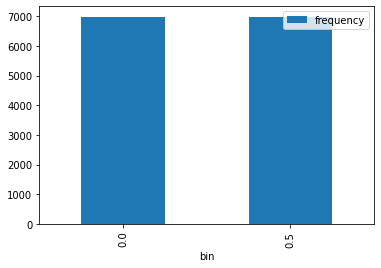

In [ ]:
gre_histogram = df_train.select('label').rdd.flatMap(lambda x: x).histogram(2)
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
list(zip(*gre_histogram)),
columns=['bin', 'frequency']
).set_index(
'bin'
).plot(kind='bar');

# VectorAssembler on train set features

Convert all the features to one feature vector

In [ ]:
# Merge all feature coloumns
columns = ['pixel{:d}'.format(k) for k in range(7308)]
assembler = VectorAssembler(inputCols=columns, 
                            outputCol="features")
Combine_df = assembler.transform(df_train)
#Combine_df.select("features", "label").show(truncate=False)

In [ ]:
Combine_df = Combine_df.select("features", "label")
Combine_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.093722927,0.09...|    0|
|[0.009433728,0.00...|    1|
|[0.01603781,0.017...|    1|
|[0.006280194,0.00...|    1|
|[0.016680166,0.01...|    1|
+--------------------+-----+
only showing top 5 rows



Data shuffeling

In [ ]:
# Shuffle data
df_transform_fin = Combine_df.orderBy(rand())
df_transform_fin.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.00998716800000...|    0|
|[0.00581403300000...|    0|
|[0.279425831,0.26...|    1|
|[0.00964683599999...|    0|
|[0.00822444,0.008...|    0|
+--------------------+-----+
only showing top 5 rows



Consider the preprocessed train dataframe as train_data

In [ ]:
train_data=df_transform_fin

Delete variable to free up space

In [ ]:
del df_transform_fin

Check the shape of the train loaded dataset, i.e., number of rows and columns




In [ ]:
print("The shape of the dataset is {:d} rows by {:d} columns".format(train_data.count(), len(train_data.columns)))

The shape of the dataset is 13956 rows by 2 columns


#  **Data Summary on test set**

# Load test data to spark dataframe

In [ ]:
# Load Data to Spark Dataframe
df_test = sql_context.read.csv('/content/gdrive/My Drive/1911242_1916304/Dataset/CQTtestshuffle.csv',
                    header=True,
                    inferSchema=True)

# Data set preprocessing

Check for any missing values

In [ ]:

for c in df_test.columns:
  print("N. of missing values of column `{:s}` = {:d}".format(c, df_test.where(col(c).isNull()).count()))


'\nfor c in df_test.columns:\n  print("N. of missing values of column `{:s}` = {:d}".format(c, df_test.where(col(c).isNull()).count()))\n'

# Statistical summary of test data

Check the shape of the train loaded dataset, i.e., number of rows and columns

In [ ]:
print("The shape of the dataset is {:d} rows by {:d} columns".format(df_test.count(), len(df_test.columns)))

The shape of the dataset is 1088 rows by 7309 columns


# Vector Assembler on test features

Convert all the features to one feature vector

In [ ]:
# Merge all feature coloumns
columns = ['pixel{:d}'.format(k) for k in range(7308)]
assembler = VectorAssembler(inputCols=columns, 
                            outputCol="features")
Combine_df_test = assembler.transform(df_test)
#Combine_df.select("features", "label").show(truncate=False)

In [ ]:
Combine_df_test = Combine_df_test.select("features", "label")
Combine_df_test.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.016204236,0.01...|    0|
|[0.025119721,0.02...|    1|
|[0.046963217,0.04...|    0|
|[0.149262389,0.14...|    1|
|[0.045458491,0.04...|    1|
+--------------------+-----+
only showing top 5 rows



Data shuffeling

In [ ]:
# Shuffle data
df_transform_fin_test = Combine_df_test.orderBy(rand())
df_transform_fin_test.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.004757981,0.00...|    0|
|[0.041888067,0.04...|    0|
|[0.017295964,0.01...|    0|
|[0.008332136,0.01...|    1|
|[0.045176416,0.04...|    1|
+--------------------+-----+
only showing top 5 rows



Consider the preprocessed test dataframe as test_data

In [ ]:
test_data=df_transform_fin_test

Check the shape of the train loaded dataset, i.e., number of rows and columns

In [ ]:
print("The shape of the dataset is {:d} rows by {:d} columns".format(test_data.count(), len(test_data.columns)))

The shape of the dataset is 1088 rows by 2 columns


Delete variable to free up space

In [ ]:
del df_transform_fin_test

![alt text](https://qph.fs.quoracdn.net/main-qimg-63fff4cd8c7d06fc83c94e05be268139)

# **Logistic Regression**

# Fit the model


1. set classifier. We set 100 itterations for the model
2. fit the model

In [ ]:
# create the trainer and set its parameters
LRA = LogisticRegression(labelCol="label", featuresCol="features", maxIter=100)
# Fit the model  
LRAModel = LRA.fit(train_data)

# Coefficients of logistic regression

Intercept ($\theta_0$) and Coefficients ($\theta_1, \ldots, \theta_n$)

In [ ]:
# Print the coefficients and intercepts for logistic regression
print("logistic regression coefficients: " + str(LRAModel.coefficientMatrix))
print("logistic regression bias: " + str(LRAModel.interceptVector))
print("number of parameters: " + str(len(LRAModel.coefficients)+1))

logistic regression coefficients: DenseMatrix([[-0.22560242, -0.29739629, -0.28593459, ...,  2.96546719,
              -7.52543425,  8.9997642 ]])
logistic regression bias: [3.6669755763761414]
number of parameters: 7309


In [ ]:
trainingSummary=LRAModel.summary

# Theta index-Theta value *curve*

This curve is used to plot the magnitude of Coefficients. Higher coefficients means higher sensivity to value changes

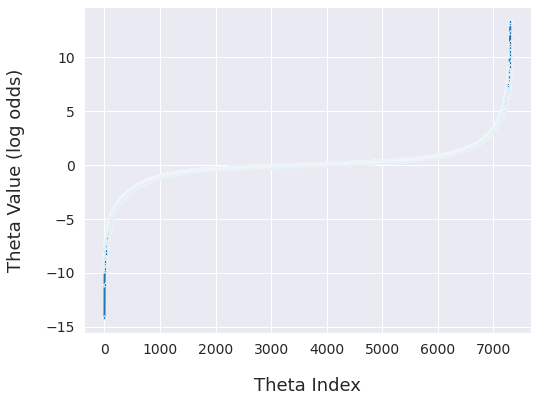

In [ ]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


# Set some default plotting configuration using seaborn properties
sns.set_style("darkgrid")
sns.set_context("notebook", rc={"lines.linewidth": 2, 
                                "xtick.labelsize":14, 
                                "ytick.labelsize":14,
                                "axes.labelsize": 18,
                                "axes.titlesize": 20,
                                })

theta = np.sort(LRAModel.coefficients)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
_ = sns.lineplot(x=range(0,len(LRAModel.coefficients)), y=theta, marker="*", axes=ax)
_ = ax.set_xlabel("Theta Index", labelpad=20)
_ = ax.set_ylabel("Theta Value (log odds)", labelpad=20)

# Precision vs. Recal curve

This curve is used to show the corresponding values of precisions and recalls for different threshhold in a learning model

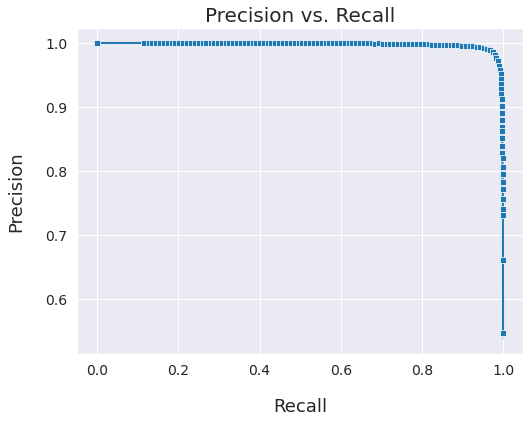

In [ ]:

precision_recall = trainingSummary.pr.toPandas()

fig, ax = plt.subplots(1, 1, figsize=(8,6))
_ = sns.lineplot(x=precision_recall['recall'], y=precision_recall['precision'], marker="s", axes=ax)
_ = ax.set_xlabel("Recall", labelpad=20)
_ = ax.set_ylabel("Precision", labelpad=20)
_ = ax.set_title("Precision vs. Recall")

# Roc curve

This curve is used to show the corresponding values of TPR and FPR for different threshhold in a learning model


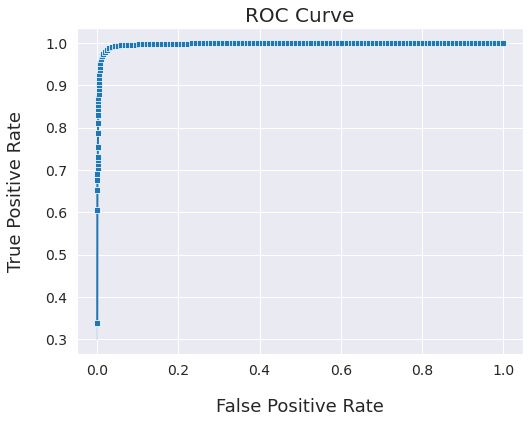

In [ ]:
roc = trainingSummary.roc.toPandas()

fig, ax = plt.subplots(1, 1, figsize=(8,6))
_ = sns.lineplot(x=roc['FPR'], y=roc['TPR'], marker="s", axes=ax)
_ = ax.set_xlabel("False Positive Rate", labelpad=20)
_ = ax.set_ylabel("True Positive Rate", labelpad=20)
_ = ax.set_title("ROC Curve")

# Evaluation on train set

area under roc and pr curve for the train data

In [ ]:
# Accuracy of model
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))
print("Train accuracy: " + str(trainingSummary.accuracy))

areaUnderROC: 0.9976249209220874
Train accuracy: 0.9808684436801376


# Make predictions on test data

In [ ]:
# Make predictions on test data
predictionsLRA = LRAModel.transform(test_data)
#Show the result of prediction
predictionsLRA.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.10758699,0.103...|    1|[0.49042122627139...|[0.62020565746669...|       0.0|
|[0.142218998,0.14...|    1|[-3.9915569906434...|[0.01813594483449...|       1.0|
|[0.149457479,0.15...|    1|[-27.204280114047...|[1.53225575896671...|       1.0|
|[0.077429615,0.09...|    1|[-19.769471243622...|[2.59554000849526...|       1.0|
|[0.026559946,0.02...|    1|[-22.596516627099...|[1.53623451588977...|       1.0|
|[0.056112199,0.05...|    1|[-18.343840791878...|[1.07986922006946...|       1.0|
|[0.018805755,0.01...|    1|[-7.7433973437238...|[4.33408071334676...|       1.0|
|[0.01200770600000...|    0|[-9.7348592161586...|[5.91805037765437...|       1.0|
|[0.03983736,0.044...|    1|[-40.726805010026...|[2.05387173655134...|       1.0|
|[0.023591328999

# Evaluation

Here we measure Area under ROC Curve and Area under PR Curve of the logistic regression Classifier on the test set using BinaryClassificationEvaluator.

In [ ]:
# Accuracy on test data by normal
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluatorLRA = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluatorLRA.evaluate(predictionsLRA))
# We have only two choices: area under ROC and PR curves :-(
auroc = evaluatorLRA.evaluate(predictionsLRA, {evaluatorLRA.metricName: "areaUnderROC"})
auprc = evaluatorLRA.evaluate(predictionsLRA, {evaluatorLRA.metricName: "areaUnderPR"})
evaluatorLRA.metricName=""
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc)) 

Test Area Under ROC 0.8892260488754324
Area under ROC Curve: 0.8892
Area under PR Curve: 0.8922


Unfortunately, BinaryClassificationEvaluator just provides Area under ROC Curve and Area under PR Curve for evaluation. Therefore we will use handy pyspark for more evaluation information. So we transfer data to handy spark framework

In [ ]:
predictionsLRA.toHandy().cols[['probability', 'prediction', 'label']][:1088]

,probability,prediction,label
0,"[0.6202056574666918, 0.3797943425333083]",0.0,1
1,"[0.018135944834498263, 0.9818640551655018]",1.0,1
2,"[1.5322557589667174e-12, 0.9999999999984677]",1.0,1
3,"[2.5955400084952606e-09, 0.99999999740446]",1.0,1
4,"[1.5362345158897717e-10, 0.9999999998463764]",1.0,1
...,...,...,...
1083,"[1.0, 4.848949802819404e-21]",0.0,0
1084,"[5.269017305836717e-10, 0.9999999994730984]",1.0,1
1085,"[0.9999696311353089, 3.0368864691048176e-05]",0.0,0
1086,"[0.9994155901078571, 0.0005844098921428268]",0.0,0


Here we measure Area under ROC Curve and Area under PR Curve of the Multilayer Perceptron Classifier on the test set using BinaryClassificationMetrics. We also plot the confusion matrix and ROC and PR curve.

Area under ROC Curve: 0.8892
Area under PR Curve: 0.8922


Predicted       
                 0      1
Actual 0     389.0  155.0
       1      74.0  470.0

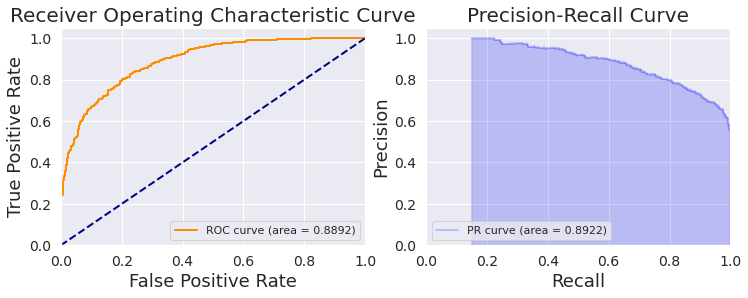

In [ ]:
# Accuracy on test data by handy pyspark
from matplotlib import pyplot as plt
bcmLRA = BinaryClassificationMetrics(predictionsLRA, scoreCol='probability', labelCol='label')
# We still can get the same metrics as the evaluator...
print("Area under ROC Curve: {:.4f}".format(bcmLRA.areaUnderROC))
print("Area under PR Curve: {:.4f}".format(bcmLRA.areaUnderPR))
# But now we can PLOT both ROC and PR curves!
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
bcmLRA.plot_roc_curve(ax=axs[0])
bcmLRA.plot_pr_curve(ax=axs[1])

# And get the confusion matrix for any threshold we want
bcmLRA.print_confusion_matrix()

Here we measure the acuracy of the model by using MulticlassClassificationEvaluator

In [ ]:
# obtain evaluator.
evaluator14 = MulticlassClassificationEvaluator(metricName="accuracy")

# compute the classification error on test data.
accuracy14 = evaluator14.evaluate(predictionsLRA)
print("Test Error = %g" % (1-accuracy14))
print("Test Accuracy = %g" % (accuracy14))

Test Error = 0.210478
Test Accuracy = 0.789522


Here we calculate TPR, TNR, FPR, FNR of our mode by using built in functions

In [ ]:
true_pos=predictionsLRA.filter(predictionsLRA['label']==1).filter(predictionsLRA['prediction']==1).count()
false_pos=predictionsLRA.filter(predictionsLRA['label']==0).filter(predictionsLRA['prediction']==1).count()
true_neg=predictionsLRA.filter(predictionsLRA['label']==0).filter(predictionsLRA['prediction']==0).count()
false_neg=predictionsLRA.filter(predictionsLRA['label']==1).filter(predictionsLRA['prediction']==0).count()

Here we calculate accuracy, precision, recall, specificity, F1 score and MCC measures of our model

In [ ]:
Accuracy=(true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
Precision=true_pos/(true_pos+false_pos)
Recall=true_pos/(true_pos+false_neg)
Specificity=true_neg/(true_neg+false_pos)
F1score=(2*Precision*Recall)/(Precision+Recall)
MCC=(true_pos*true_neg-false_neg*false_pos)/math.sqrt((true_pos+false_pos)*(true_pos+false_neg)*(true_neg+false_pos)*(true_neg+false_neg))

In [ ]:
print("True Positive Value: {:.0f}".format(true_pos))
print("False Positive Value: {:.0f}".format(false_pos))
print("True Negative Value: {:.0f}".format(true_neg))
print("False Negative Value: {:.0f}".format(false_neg))
print("Accuracy Measure: {:.4f}".format(Accuracy))
print("Precision Measure: {:.4f}".format(Precision))
print("Recall Measure: {:.4f}".format(Recall))
print("Specificity Measure: {:.4f}".format(Specificity))
print("F1score Measure: {:.4f}".format(F1score))
print("MCC Measure: {:.4f}".format(MCC))

True Positive Value: 470
False Positive Value: 155
True Negative Value: 389
False Negative Value: 74
Accuracy Measure: 0.7895
Precision Measure: 0.7520
Recall Measure: 0.8640
Specificity Measure: 0.7151
F1score Measure: 0.8041
MCC Measure: 0.5856


![alt text](https://images.ctfassets.net/be04ylp8y0qc/4LbV7b6tEVlHROxHevpy2K/4ff835465f0a106104a79eaf17ca189c/1_P36a5xEr_C3fjcJU69yYmg.png?fm=jpg)

# **Hyper parameter tunning on logistic regression**

# Train model with defferent hyper paremeters on train set

In [ ]:
# Define raw model
log_reg_LR = LogisticRegression(labelCol="label", featuresCol="features", maxIter=100)
# Grid search on hyper parameters(regParam, elasticNetParam)
param_grid_LR = ParamGridBuilder()\
.addGrid(log_reg_LR.regParam, [0.0, 0.05, 0.1]) \
.addGrid(log_reg_LR.elasticNetParam, [0.0, 0.5, 1.0]) \
.build()
# Set crossValidator parameters
cross_val_LR = CrossValidator(estimator=log_reg_LR, 
                               estimatorParamMaps=param_grid_LR,
                               evaluator=BinaryClassificationEvaluator(metricName="areaUnderROC"), # default = "areaUnderROC", alternatively "areaUnderPR"
                               numFolds=3,
                               collectSubModels=True # this flag allows us to store ALL the models trained during k-fold cross validation
                               )
# Run cross-validation, and choose the best set of parameters.
cv_model_LR = cross_val_LR.fit(train_data)

# Summary of different models

In [ ]:
cv_model_LR.subModels

[[LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308,
  LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308,
  LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308,
  LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308,
  LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308,
  LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308,
  LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308,
  LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308,
  LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308],
 [LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2,

In [ ]:
# This function summarizes all the models trained during k-fold cross validation
def summarize_all_models(cv_models):
    for k, models in enumerate(cv_models):
        print("*************** Fold #{:d} ***************\n".format(k+1))
        for i, m in enumerate(models):
            print("--- Model #{:d} out of {:d} ---".format(i+1, len(models)))
            print("\tParameters: lambda=[{:.3f}]; alpha=[{:.3f}] ".format(m._java_obj.getRegParam(), m._java_obj.getElasticNetParam()))
            print("\tModel summary: {}\n".format(m))
        print("***************************************\n")

In [ ]:
# Call the function above|
summarize_all_models(cv_model_LR.subModels)

*************** Fold #1 ***************

--- Model #1 out of 9 ---
	Parameters: lambda=[0.000]; alpha=[0.000] 
	Model summary: LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308

--- Model #2 out of 9 ---
	Parameters: lambda=[0.000]; alpha=[0.500] 
	Model summary: LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308

--- Model #3 out of 9 ---
	Parameters: lambda=[0.000]; alpha=[1.000] 
	Model summary: LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308

--- Model #4 out of 9 ---
	Parameters: lambda=[0.050]; alpha=[0.000] 
	Model summary: LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308

--- Model #5 out of 9 ---
	Parameters: lambda=[0.050]; alpha=[0.500] 
	Model summary: LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308

--- Model #6 out of 9 ---
	Pa

In [ ]:
for i, avg_roc_auc in enumerate(cv_model_LR.avgMetrics):
    print("Avg. ROC AUC computed across k-fold cross validation for model setting #{:d}: {:.3f}".format(i+1, avg_roc_auc))

Avg. ROC AUC computed across k-fold cross validation for model setting #1: 0.857
Avg. ROC AUC computed across k-fold cross validation for model setting #2: 0.857
Avg. ROC AUC computed across k-fold cross validation for model setting #3: 0.857
Avg. ROC AUC computed across k-fold cross validation for model setting #4: 0.910
Avg. ROC AUC computed across k-fold cross validation for model setting #5: 0.870
Avg. ROC AUC computed across k-fold cross validation for model setting #6: 0.813
Avg. ROC AUC computed across k-fold cross validation for model setting #7: 0.914
Avg. ROC AUC computed across k-fold cross validation for model setting #8: 0.817
Avg. ROC AUC computed across k-fold cross validation for model setting #9: 0.576


# Best hyper parameters of the model

In [ ]:
print("Best model according to k-fold cross validation: lambda=[{:.3f}]; alfa=[{:.3f}]".
      format(cv_model_LR.bestModel._java_obj.getRegParam(), 
             cv_model_LR.bestModel._java_obj.getElasticNetParam(),
             )
      )
print(cv_model_LR.bestModel)

Best model according to k-fold cross validation: lambda=[0.100]; alfa=[0.000]
LogisticRegressionModel: uid = LogisticRegression_d14b00e5fa55, numClasses = 2, numFeatures = 7308


# Evaluating the performance of the best model on train data

In [ ]:
# `bestModel` is the best resulting model according to k-fold cross validation, which is also entirely retrained on the whole `train_df`
training_result = cv_model_LR.bestModel.summary
print("***** Training Set *****")
print("Area Under ROC Curve (ROC AUC): {:.3f}".format(training_result.areaUnderROC))
print("***** Training Set *****")

***** Training Set *****
Area Under ROC Curve (ROC AUC): 0.961
***** Training Set *****


# Make predictions of the best model on test data

In [ ]:
# Make predictions on test data.
predictionLRbest = cv_model_LR.bestModel.transform(test_data)
#Show the result of prediction
predictionLRbest.select("features", "prediction", "label").show(5)

+--------------------+----------+-----+
|            features|prediction|label|
+--------------------+----------+-----+
|[0.004757981,0.00...|       0.0|    0|
|[0.041888067,0.04...|       1.0|    0|
|[0.017295964,0.01...|       0.0|    0|
|[0.008332136,0.01...|       0.0|    1|
|[0.045176416,0.04...|       1.0|    1|
+--------------------+----------+-----+
only showing top 5 rows



# Evaluation

Here we measure Area under ROC Curve and Area under PR Curve of the best model of the logistic regression on the test set using BinaryClassificationEvaluator

In [ ]:
evaluatorLRbest = BinaryClassificationEvaluator(labelCol='label')
# Area under ROC curve and precision-recal curve
auroc = evaluatorLRbest.evaluate(predictionLRbest, {evaluatorLRbest.metricName: "areaUnderROC"})
auprc = evaluatorLRbest.evaluate(predictionLRbest, {evaluatorLRbest.metricName: "areaUnderPR"})
evaluatorLRbest.metricName=""
# Print the result
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc))

Area under ROC Curve: 0.9208
Area under PR Curve: 0.9230


In [ ]:
def evaluate_model(predictions, metric="areaUnderROC"):
    
    from pyspark.ml.evaluation import BinaryClassificationEvaluator
    evaluator = BinaryClassificationEvaluator(metricName=metric)
    return evaluator.evaluate(predictions)

In [ ]:
print("***** Test Set *****")
print("Area Under ROC Curve (ROC AUC): {:.3f}".format(evaluate_model(predictionLRbest)))
print("Area Under Precision-Recall Curve: {:.3f}".format(evaluate_model(predictionLRbest, metric="areaUnderPR")))
print("***** Test Set *****")

***** Test Set *****
Area Under ROC Curve (ROC AUC): 0.921
Area Under Precision-Recall Curve: 0.923
***** Test Set *****


Here we measure the accuracy of the model by using MulticlassClassificationEvaluator

In [ ]:
evaluator141 = MulticlassClassificationEvaluator(metricName="accuracy")
# compute the classification error on test data.
accuracy141 = evaluator141.evaluate(predictionLRbest)
print("Test Accuracy = %g" % (accuracy141))
print("Test Error = %g" % (1- accuracy141))

Test Accuracy = 0.825368
Test Error = 0.174632


![alt text](https://www.learnopencv.com/wp-content/uploads/2018/07/support-vector-machine-cover.jpg)

# **Linear Support Vector Machine (SVM)**

# Train the model

1. set classifier with 100 itterations.
3. fit the model

In [ ]:
# Set parameters for svm
lsvc = LinearSVC(labelCol="label", featuresCol="features", maxIter=100)
# Fit the model
lsvcModel = lsvc.fit(train_data)

# Make predictions on test data



1. Perform the learned model to test dataset
2. Show the label , prediction and probability of predictions on each single test set data

In [ ]:
# Make predictions on test data.
predictionslsvc = lsvcModel.transform(test_data)
#Show the result of prediction
predictionslsvc.show()

+--------------------+-----+--------------------+----------+
|            features|label|       rawPrediction|prediction|
+--------------------+-----+--------------------+----------+
|[0.10758699,0.103...|    1|[-0.1777969559877...|       1.0|
|[0.142218998,0.14...|    1|[-2.1260202488998...|       1.0|
|[0.149457479,0.15...|    1|[-6.4108462550291...|       1.0|
|[0.077429615,0.09...|    1|[-5.4146692774245...|       1.0|
|[0.026559946,0.02...|    1|[-3.4388572283410...|       1.0|
|[0.056112199,0.05...|    1|[-3.2437718045471...|       1.0|
|[0.018805755,0.01...|    1|[-1.7711457165662...|       1.0|
|[0.01200770600000...|    0|[1.75450824093689...|       0.0|
|[0.03983736,0.044...|    1|[-3.2614223376822...|       1.0|
|[0.02359132899999...|    0|[-2.0404245770184...|       1.0|
|[0.03016278399999...|    0|[-1.5587956307107...|       1.0|
|[0.02701085299999...|    1|[-4.0147427236675...|       1.0|
|[0.02637548399999...|    0|[5.76818393954308...|       0.0|
|[0.062411247,0.06...|  

# Coefficients and intercept of SVM

In [ ]:
# Print the coefficients and intercept for linear SVC
print("Coefficients: " + str(lsvcModel.coefficients))
print("Intercept: " + str(lsvcModel.intercept))

Coefficients: [0.004520516868412036,0.005065113169052087,0.007318181549400716,0.008305022954726977,0.009224660446387783,0.009759522524084392,0.009212265447561693,0.006787003356122161,0.0001606568949061161,-0.0007234951364907037,-0.003685604555806518,-0.008096402882434075,-0.0036853870033346898,0.0009764155500333221,0.0013523856591750362,0.003946502493571024,0.007162927210213973,0.00829044779881568,0.0075538580228391,0.007011804861750872,0.006159129632889314,0.005417226141742453,0.004773253590585814,0.0023037021427526603,0.0015421719452039934,0.0009212136045730782,0.00026513061981099645,0.0,0.005294261913856826,0.005084596598359084,0.0036850051955185483,0.0033084229239796785,0.000988120949088479,-0.001457226818898075,-0.010321080526994545,-0.012307222288717367,-0.02014932384088653,-0.01871446949675345,-0.016878394317395788,-0.009663229114322039,0.0,0.0060655047690717084,0.008358425008692013,0.009644548543688734,0.010560061374439425,0.011321375792303322,0.01242453832007214,0.012512402814

# Evaluation



Here we measure Area under ROC Curve and Area under PR Curve of the SVM on the test set using BinaryClassificationEvaluator.

In [ ]:
# Evaluate model by using BinaryClassificationEvaluator function
evaluatorlsvc = BinaryClassificationEvaluator(labelCol='label')
# Area under ROC curve and precision-recal curve
auroc = evaluatorlsvc.evaluate(predictionslsvc, {evaluatorlsvc.metricName: "areaUnderROC"})
auprc = evaluatorlsvc.evaluate(predictionslsvc, {evaluatorlsvc.metricName: "areaUnderPR"})
evaluatorlsvc.metricName=""
# Print the result
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc))

Area under ROC Curve: 0.9252
Area under PR Curve: 0.9278


Here we measure the acuracy of the model by using MulticlassClassificationEvaluator

In [ ]:
evaluator12 = MulticlassClassificationEvaluator(metricName="accuracy")
# compute the classification error on test data.
accuracy12 = evaluator12.evaluate(predictionslsvc)
print("Test Accuracy = %g" % (accuracy12))
print("Test Error = %g" % (1- accuracy12))

Test Accuracy = 0.816176
Test Error = 0.183824


Here we calculate TPR, TNR, FPR, FNR of our mode by using built in functions

In [ ]:
true_pos=predictionslsvc.filter(predictionslsvc['label']==1).filter(predictionslsvc['prediction']==1).count()
false_pos=predictionslsvc.filter(predictionslsvc['label']==0).filter(predictionslsvc['prediction']==1).count()
true_neg=predictionslsvc.filter(predictionslsvc['label']==0).filter(predictionslsvc['prediction']==0).count()
false_neg=predictionslsvc.filter(predictionslsvc['label']==1).filter(predictionslsvc['prediction']==0).count()

Here we calculate accuracy, precision, recall, specificity, F1 score and MCC measures of our model

In [ ]:
Accuracy=(true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
Precision=true_pos/(true_pos+false_pos)
Recall=true_pos/(true_pos+false_neg)
Specificity=true_neg/(true_neg+false_pos)
F1score=(2*Precision*Recall)/(Precision+Recall)
MCC=(true_pos*true_neg-false_neg*false_pos)/math.sqrt((true_pos+false_pos)*(true_pos+false_neg)*(true_neg+false_pos)*(true_neg+false_neg))

In [ ]:
print("True Positive Value: {:.0f}".format(true_pos))
print("False Positive Value: {:.0f}".format(false_pos))
print("True Negative Value: {:.0f}".format(true_neg))
print("False Negative Value: {:.0f}".format(false_neg))
print("Accuracy Measure: {:.4f}".format(Accuracy))
print("Precision Measure: {:.4f}".format(Precision))
print("Recall Measure: {:.4f}".format(Recall))
print("Specificity Measure: {:.4f}".format(Specificity))
print("F1score Measure: {:.4f}".format(F1score))
print("MCC Measure: {:.4f}".format(MCC))

True Positive Value: 500
False Positive Value: 156
True Negative Value: 388
False Negative Value: 44
Accuracy Measure: 0.8162
Precision Measure: 0.7622
Recall Measure: 0.9191
Specificity Measure: 0.7132
F1score Measure: 0.8333
MCC Measure: 0.6462


![alt text](https://i2.wp.com/scienceprog.com/wp-content/uploads/2016/07/Thomas_Bayes.png?w=468&ssl=1)

# **Naive bayes**

# Train the model

1. set classifier with multinomial model type
2. fit the model

In [ ]:
# Set parameters for svm
nb = NaiveBayes(modelType="multinomial")
# Fit the model
model_nb = nb.fit(train_data)

# Make predictions on test data


1. Perform the learned model to test dataset
2. Show the label , prediction and probability of predictions on each single test set data

In [ ]:
# Make predictions on test data
predictions_nb = model_nb.transform(test_data)
#Show the result of prediction
predictions_nb.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.10758699,0.103...|    1|[-15054.397538627...|[8.07767784848817...|       1.0|
|[0.142218998,0.14...|    1|[-15948.969366784...|[1.0,3.8987239329...|       0.0|
|[0.149457479,0.15...|    1|[-14685.532293589...|[1.0,9.7287099945...|       0.0|
|[0.077429615,0.09...|    1|[-15865.865464276...|[1.0,1.9379026142...|       0.0|
|[0.026559946,0.02...|    1|[-12597.475044316...|[1.0,1.3279424544...|       0.0|
|[0.056112199,0.05...|    1|[-14239.361443636...|[1.0,7.5138195793...|       0.0|
|[0.018805755,0.01...|    1|[-9994.6987779411...|[2.40831085186145...|       1.0|
|[0.01200770600000...|    0|[-13493.330993591...|[0.99999999999999...|       0.0|
|[0.03983736,0.044...|    1|[-12352.518655808...|[1.0,3.5426220309...|       0.0|
|[0.023591328999

# Evaluation

Here we measure the acuracy of the model by using MulticlassClassificationEvaluator

In [ ]:
evaluator13 = MulticlassClassificationEvaluator(metricName="accuracy")
# compute the classification error on test data.
accuracy13 = evaluator13.evaluate(predictions_nb)
print("Test Accuracy = %g" % (accuracy13))
print("Test Error = %g" % (1-accuracy13))

Test Accuracy = 0.555147
Test Error = 0.444853


We transfer data to handy spark framework

In [ ]:
predictions_nb.toHandy().cols[['probability', 'prediction', 'label']][:1088]

,probability,prediction,label
0,"[8.077677848488179e-11, 0.9999999999192233]",1.0,1
1,"[1.0, 3.898723932907172e-77]",0.0,1
2,"[1.0, 9.728709994510783e-24]",0.0,1
3,"[1.0, 1.9379026142911808e-30]",0.0,1
4,"[1.0, 1.3279424544394356e-19]",0.0,1
...,...,...,...
1083,"[1.0, 2.1647644173791446e-82]",0.0,0
1084,"[3.682350205171385e-08, 0.999999963176498]",1.0,1
1085,"[1.0, 1.6677920963082427e-47]",0.0,0
1086,"[3.078403973701694e-07, 0.9999996921596026]",1.0,0


Here we measure Area under ROC Curve and Area under PR Curve of the naive Bayes Classifier on the test set using BinaryClassificationMetrics.

In [ ]:
# Accuracy on test data by handy pyspark
bcmnb = BinaryClassificationMetrics(predictions_nb, scoreCol='probability', labelCol='label')
print("Area under ROC Curve: {:.4f}".format(bcmnb.areaUnderROC))
print("Area under PR Curve: {:.4f}".format(bcmnb.areaUnderPR))

Area under ROC Curve: 0.6754
Area under PR Curve: 0.6658


Here we measure Area under ROC Curve and Area under PR Curve of the naive Bayes Classifier on the test set using BinaryClassificationEvaluator.

Here we calculate TPR, TNR, FPR, FNR of our mode by using built in functions

In [ ]:
true_pos=predictions_nb.filter(predictions_nb['label']==1).filter(predictions_nb['prediction']==1).count()
false_pos=predictions_nb.filter(predictions_nb['label']==0).filter(predictions_nb['prediction']==1).count()
true_neg=predictions_nb.filter(predictions_nb['label']==0).filter(predictions_nb['prediction']==0).count()
false_neg=predictions_nb.filter(predictions_nb['label']==1).filter(predictions_nb['prediction']==0).count()

Here we calculate accuracy, precision, recall, specificity, F1 score and MCC measures of our model

In [ ]:
Accuracy=(true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
Precision=true_pos/(true_pos+false_pos)
Recall=true_pos/(true_pos+false_neg)
Specificity=true_neg/(true_neg+false_pos)
F1score=(2*Precision*Recall)/(Precision+Recall)
MCC=(true_pos*true_neg-false_neg*false_pos)/math.sqrt((true_pos+false_pos)*(true_pos+false_neg)*(true_neg+false_pos)*(true_neg+false_neg))

In [ ]:
print("True Positive Value: {:.0f}".format(true_pos))
print("False Positive Value: {:.0f}".format(false_pos))
print("True Negative Value: {:.0f}".format(true_neg))
print("False Negative Value: {:.0f}".format(false_neg))
print("Accuracy Measure: {:.4f}".format(Accuracy))
print("Precision Measure: {:.4f}".format(Precision))
print("Recall Measure: {:.4f}".format(Recall))
print("Specificity Measure: {:.4f}".format(Specificity))
print("F1score Measure: {:.4f}".format(F1score))
print("MCC Measure: {:.4f}".format(MCC))

True Positive Value: 217
False Positive Value: 157
True Negative Value: 387
False Negative Value: 327
Accuracy Measure: 0.5551
Precision Measure: 0.5802
Recall Measure: 0.3989
Specificity Measure: 0.7114
F1score Measure: 0.4728
MCC Measure: 0.1161


# Extraction of the number of classes and input dimensions 

Here we determine the number of classes as well as the number of inputs from our data as input in our models

In [ ]:
# Number of Classes
nb_classes = train_data.select("label").distinct().count()
# Number of Inputs or Input Dimensions
input_dim = len(train_data.select("features").first()[0])
print(input_dim)
print(nb_classes)

7308
2


![alt text](https://austingwalters.com/wp-content/uploads/2018/12/mlp.png)

# **Multilayer Perceptron Classifier**

# Fit the model

1. define fully connected layers 
2. set classifier with 100 itterations and blocksize equals to 32
3. fit the model

In [ ]:
# set the layers
layers = [input_dim,40, 2]
# create the trainer and set its parameters
FNN = MultilayerPerceptronClassifier(labelCol="label", featuresCol="features",maxIter=100, layers=layers, blockSize=32, seed=1234)     
# fit model                                   
modelFNN = FNN.fit(train_data)

# Make predictions

1. Perform the learned model to test dataset
2. Show the label , prediction and probability of predictions on each single test set data

In [ ]:
# Make predictions
predictionsFNN = modelFNN.transform(test_data)
# Show the predictions
predictionsFNN.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.10758699,0.103...|    1|[-4.1171704019568...|[4.45962752297864...|       1.0|
|[0.142218998,0.14...|    1|[-8.2990793603419...|[5.79986724899497...|       1.0|
|[0.149457479,0.15...|    1|[-10.150255771470...|[1.44089739535230...|       1.0|
|[0.077429615,0.09...|    1|[-10.005996298453...|[1.49739398293294...|       1.0|
|[0.026559946,0.02...|    1|[8.20874425536236...|[0.99999995869246...|       0.0|
|[0.056112199,0.05...|    1|[-2.2299635935655...|[0.00805728150638...|       1.0|
|[0.018805755,0.01...|    1|[6.75182348656248...|[0.99999909767097...|       0.0|
|[0.01200770600000...|    0|[13.8451869783218...|[0.99999999999939...|       0.0|
|[0.03983736,0.044...|    1|[-4.9494501509775...|[8.11772015629760...|       1.0|
|[0.023591328999

Print the number of tunned weights during learning process

In [ ]:
print("number of weights=" + str(len(modelFNN.weights)))

number of weights=292442


# Evaluation

Here we measure Area under ROC Curve and Area under PR Curve of the Multilayer Perceptron Classifier on the test set using BinaryClassificationEvaluator.

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluatorFNN = BinaryClassificationEvaluator(labelCol='label')
auroc = evaluatorFNN.evaluate(predictionsFNN, {evaluatorFNN.metricName: "areaUnderROC"})
auprc = evaluatorFNN.evaluate(predictionsFNN, {evaluatorFNN.metricName: "areaUnderPR"})
evaluatorFNN.metricName=""
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc))

Area under ROC Curve: 0.9014
Area under PR Curve: 0.9018


Here we measure the acuracy of the model by using MulticlassClassificationEvaluator

In [ ]:
evaluator11 = MulticlassClassificationEvaluator(metricName="accuracy")
# compute the classification error on test data.
accuracy11 = evaluator11.evaluate(predictionsFNN)
print("Test Accuracy = %g" % (accuracy11))
print("Test Error = %g" % (1-accuracy11))

Test Accuracy = 0.841912
Test Error = 0.158088


Unfortunately, BinaryClassificationEvaluator just provides Area under ROC Curve and Area under PR Curve for evaluation. Therefore we will use handy pyspark for more evaluation information. So we transfer data to handy spark framework

In [ ]:
from handyspark import *
predictionsFNN.toHandy().cols[['probability', 'prediction', 'label']][:1088]

,probability,prediction,label
0,"[0.0004459627522978641, 0.999554037247702]",1.0,1
1,"[5.799867248994974e-08, 0.9999999420013275]",1.0,1
2,"[1.440897395352302e-09, 0.9999999985591026]",1.0,1
3,"[1.497393982932945e-09, 0.999999998502606]",1.0,1
4,"[0.9999999586924665, 4.130753339253114e-08]",0.0,1
...,...,...,...
1083,"[0.9999999999974027, 2.5972625462872996e-12]",0.0,0
1084,"[0.00015620214497330867, 0.9998437978550268]",1.0,1
1085,"[0.9999999999971667, 2.8333070974989682e-12]",0.0,0
1086,"[0.9999947294259752, 5.2705740247752585e-06]",0.0,0


Here we measure Area under ROC Curve and Area under PR Curve of the Multilayer Perceptron Classifier on the test set using BinaryClassificationMetrics. We also plot the confusion matrix and ROC and PR curve.

Area under ROC Curve: 0.9017
Area under PR Curve: 0.9041


Predicted       
                 0      1
Actual 0     476.0   68.0
       1     104.0  440.0

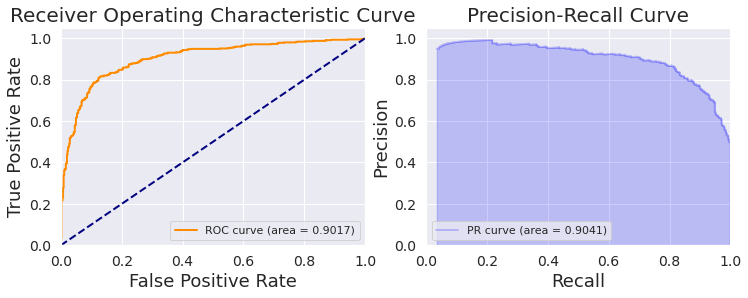

In [ ]:
# evaluation with handy pyspark
from matplotlib import pyplot as plt

bcmFNN = BinaryClassificationMetrics(predictionsFNN, scoreCol='probability', labelCol='label')
print("Area under ROC Curve: {:.4f}".format(bcmFNN.areaUnderROC))
print("Area under PR Curve: {:.4f}".format(bcmFNN.areaUnderPR))
# PLOT both ROC and PR curves!
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
bcmFNN.plot_roc_curve(ax=axs[0])
bcmFNN.plot_pr_curve(ax=axs[1])
bcmFNN.print_confusion_matrix()

Here we calculate TPR, TNR, FPR, FNR of our mode by using built in functions


In [ ]:
import math 
true_pos=predictionsFNN.filter(predictionsFNN['label']==1).filter(predictionsFNN['prediction']==1).count()
false_pos=predictionsFNN.filter(predictionsFNN['label']==0).filter(predictionsFNN['prediction']==1).count()
true_neg=predictionsFNN.filter(predictionsFNN['label']==0).filter(predictionsFNN['prediction']==0).count()
false_neg=predictionsFNN.filter(predictionsFNN['label']==1).filter(predictionsFNN['prediction']==0).count()

Here we calculate accuracy, precision, recall, specificity, F1 score and MCC measures of our model

In [ ]:
Accuracy=(true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
Precision=true_pos/(true_pos+false_pos)
Recall=true_pos/(true_pos+false_neg)
Specificity=true_neg/(true_neg+false_pos)
F1score=(2*Precision*Recall)/(Precision+Recall)
MCC=(true_pos*true_neg-false_neg*false_pos)/math.sqrt((true_pos+false_pos)*(true_pos+false_neg)*(true_neg+false_pos)*(true_neg+false_neg))

In [ ]:
print("True Positive Value: {:.0f}".format(true_pos))
print("False Positive Value: {:.0f}".format(false_pos))
print("True Negative Value: {:.0f}".format(true_neg))
print("False Negative Value: {:.0f}".format(false_neg))
print("Accuracy Measure: {:.4f}".format(Accuracy))
print("Precision Measure: {:.4f}".format(Precision))
print("Recall Measure: {:.4f}".format(Recall))
print("Specificity Measure: {:.4f}".format(Specificity))
print("F1score Measure: {:.4f}".format(F1score))
print("MCC Measure: {:.4f}".format(MCC))

True Positive Value: 440
False Positive Value: 68
True Negative Value: 476
False Negative Value: 104
Accuracy Measure: 0.8419
Precision Measure: 0.8661
Recall Measure: 0.8088
Specificity Measure: 0.8750
F1score Measure: 0.8365
MCC Measure: 0.6853


![alt text](https://www.domsoria.com/wp-content/uploads/2018/04/keras.png)

# **Keras + Tensorflow Colab Setup**



The default keras and tensorflow versions in pyspark and google colab platform are 2.3.1 and 2.2.0 repectively. 
If we want to build a neural network model using keras, we face with incompatibility issues. Therefore, it is necessary to downgrade the versions of keras and tensorflow into 2.2.2 and 1.4 sequentially. After performing the following commands, we must restart the kernel in order to fetch the changes.

In [ ]:
!pip install q keras==2.2.2
!pip install tensorflow==1.4

     |████████████████████████████████| 307kB 8.2MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
ERROR: tensorflow 2.2.0 has requirement keras-preprocessing>=1.1.0, but you'll have keras-preprocessing 1.0.2 which is incompatible.
  Found existing installation: Keras-Applications 1.0.8
    Uninstalling Keras-Applications-1.0.8:
      Successfully uninstalled Keras-Applications-1.0.8
  Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 41.2MB 1.2MB/s 
     |████████████████████████████████| 1.7MB 53.0MB/s 
     |████████████████████████████████| 890kB 55.3MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=53650547e6d2d6d7b8da45b088731e9dbdf58353ce3e284badd10291c641df3c
 

In [ ]:
#@title Configuration and Import Dependencies


!pip install pyspark==2.4.5
!pip install -U -q PyDrive
!pip install elephas
!apt install openjdk-8-jdk-headless -qq
#------------------------------------------------------------------------------#
# Import Java path--> Set path to JAVA_HOME
JAVA_HOME = "/usr/lib/jvm/java-8-openjdk-amd64"
# Google Drive Prepration
GDRIVE_DIR = "/content/gdrive" # Your own mount point on Google Drive
GDRIVE_HOME_DIR = GDRIVE_DIR + "/My Drive" # Your own home directory
GDRIVE_DATA_DIR = GDRIVE_HOME_DIR + "/1911242_1916304" # Your own data directory
# Point Colaboratory to our Google Drive
#------------------------------------------------------------------------------#
import os
os.environ["JAVA_HOME"] = JAVA_HOME
# Spark Session, Pipeline, Functions, and Metrics
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, StandardScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import rand
from pyspark.mllib.evaluation import MulticlassMetrics
# Keras / Deep Learning
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers, regularizers
from keras.optimizers import Adam
# Elephas for Deep Learning on Spark
from elephas.ml_model import ElephasEstimator
# Google drive
from google.colab import drive
# ML libraries
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import LogisticRegression
# CSV and pandas libraries
import csv
import pandas as pd
#------------------------------------------------------------------------------#
# create the session
conf = SparkConf().set("spark.ui.port", "4050").set('spark.executor.memory', '4G').set('spark.driver.memory', '45G').set('spark.driver.maxResultSize', '10G')

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()
sql_context = SQLContext(sc)
print(sc)
print(sc._conf.getAll())

# Print Keras and Tensorflow *Version*

In [ ]:
# Print keras and tensor flow version
print(keras.__version__)
print(tf.__version__)

2.2.2
1.4.0


# Define Google Drive Path

In [ ]:
# Google Drive Prepration
GDRIVE_DIR = "/content/gdrive" # Your own mount point on Google Drive
GDRIVE_HOME_DIR = GDRIVE_DIR + "/My Drive" # Your own home directory
GDRIVE_DATA_DIR = GDRIVE_HOME_DIR + "/1911242_1916304/Sample_Data" # Your own data directory
from google.colab import drive
drive.mount(GDRIVE_DIR, force_remount=True)

In [ ]:
#@title Data Collection
df_train = sql_context.read.csv('/content/gdrive/My Drive/1911242_1916304/Dataset/CQTshuffle.csv',
                    header=True,
                    inferSchema=True)

# Merge all feature coloumns
columns = ['pixel{:d}'.format(k) for k in range(7308)]
assembler = VectorAssembler(inputCols=columns, 
                            outputCol="features")
Combine_df = assembler.transform(df_train)
#Combine_df.select("features", "label").show(truncate=False)
Combine_df = Combine_df.select("features", "label")
df_transform_fin = Combine_df.orderBy(rand())
train_data=df_transform_fin
# Load Data to Spark Dataframe
df_test = sql_context.read.csv('/content/gdrive/My Drive/1911242_1916304/Dataset/CQTtestshuffle.csv',
                    header=True,
                    inferSchema=True)
# Merge all feature coloumns
columns = ['pixel{:d}'.format(k) for k in range(7308)]
assembler = VectorAssembler(inputCols=columns, 
                            outputCol="features")
Combine_df_test = assembler.transform(df_test)
#Combine_df.select("features", "label").show(truncate=False)
Combine_df_test = Combine_df_test.select("features", "label")
df_transform_fin_test = Combine_df_test.orderBy(rand())
test_data=df_transform_fin_test

# **Keras**

# Set learning architecture

A network with 2 layers of 40 and 2 nodes. The activation functions are relu and sigmoid respectively. We use adam optimizer as well as binary_crossentropy loss function

In [ ]:
# Set up Deep Learning Model / Architecture
model = Sequential()
model.add(Dense(40, input_shape=(7308,)))
model.add(Activation('relu'))
#model.add(Dense(128, activity_regularizer=regularizers.l2(0.01)))
#model.add(Activation('relu'))
#model.add(Dropout(rate=0.1))
#model.add(Dense(20, activity_regularizer=regularizers.l2(0.01)))
#model.add(Activation('relu'))
#model.add(Dropout(rate=0.1))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                292360    
_________________________________________________________________
activation_1 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 82        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 292,442
Trainable params: 292,442
Non-trainable params: 0
_________________________________________________________________


# Set learning parameters

learning rate = 0.01, number of epoches= 100, batch_size=32, metrics = accuracy

In [ ]:
# Set and Serialize Optimizer
optimizer_conf = optimizers.Adam(lr=0.01)
opt_conf = optimizers.serialize(optimizer_conf)
# Initialize SparkML Estimator and Get Settings
estimator = ElephasEstimator()
estimator.setFeaturesCol("features")
estimator.setLabelCol("label")
estimator.set_keras_model_config(model.to_yaml())
estimator.set_categorical_labels(True)
estimator.set_nb_classes(2)
estimator.set_num_workers(1)
estimator.set_epochs(100) 
estimator.set_batch_size(32)
estimator.set_verbosity(1)
estimator.set_validation_split(0.10)
estimator.set_optimizer_config(opt_conf)
estimator.set_mode("synchronous")
estimator.set_loss("binary_crossentropy")
estimator.set_metrics(['acc'])

ElephasEstimator_59ea9aabdd97

# Create deep learning pipeline

In [ ]:
# Create Deep Learning Pipeline
dl_pipeline = Pipeline(stages=[estimator])

In [ ]:
def dl_pipeline_fit_score_results(dl_pipeline=dl_pipeline,
                                  train_data=train_data,
                                  test_data=test_data,
                                  label='label'):
    
    fit_dl_pipeline = dl_pipeline.fit(train_data)
    pred_train = fit_dl_pipeline.transform(train_data)
    pred_test = fit_dl_pipeline.transform(test_data)
    
    pnl_train = pred_train.select(label, "prediction")
    pnl_test = pred_test.select(label, "prediction")
    
    pred_and_label_train = pnl_train.rdd.map(lambda row: (row[label], row['prediction']))
    pred_and_label_test = pnl_test.rdd.map(lambda row: (row[label], row['prediction']))
    
    metrics_train = MulticlassMetrics(pred_and_label_train)
    metrics_test = MulticlassMetrics(pred_and_label_test)
    
    
    
    print("Training Data Accuracy: {}".format(round(metrics_train.precision(),4)))
    print("Training Data Confusion Matrix")
    display(pnl_train.crosstab('label', 'prediction').toPandas())
    
    print("\nTest Data Accuracy: {}".format(round(metrics_test.precision(),4)))
    print("Test Data Confusion Matrix")
    display(pnl_test.crosstab('label', 'prediction').toPandas())

In [ ]:
dl_pipeline_fit_score_results(dl_pipeline=dl_pipeline,
                              train_data=train_data,
                              test_data=test_data,
                              label='label');

>>> Fit model
>>> Synchronous training complete.
Training Data Accuracy: 0.9855
Training Data Confusion Matrix


,label_prediction,0.0,1.0
0,1.0,98,6880
1,0.0,6873,105



Test Data Accuracy: 0.8364
Test Data Confusion Matrix


,label_prediction,0.0,1.0
0,1.0,102,442
1,0.0,468,76
